# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






#placeholder: tensors are fed externally for example input tensors + output tensors
#variables: tensors represent the parameters of the network graph

In [0]:
import tensorflow as tf
import numpy as np

#Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

#Network parameters
num_inputs = 3
num_outputs = 4
num_samples = 2

X = np.random.rand(num_samples,num_inputs)
Y_gr = np.random.rand(num_samples,num_outputs)

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs]))

# model
y_p = tf.matmul(x, w_1)

# cost
cost = tf.reduce_mean(tf.pow(y-y_p,2)) #mean squared error

#optimisation
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialization of the graph
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess: #Can also be used with sess = tf.Session(), but then needs to be closed manually
  sess.run(init)
  
  for i in range(10):
    sess.run(optimizer, feed_dict={x:X, y:Y_gr})
    pr_cost = sess.run(cost, feed_dict={x:X, y:Y_gr})
    print('Iteration',i,'Cost: ',pr_cost)
  
  y_p_p = sess.run(y_p, feed_dict={x:X, y:Y_gr})
  print('Predicted: ',y_p_p)
  print("Ground truth: ", Y_gr)

Predicted:  [[ 0.49620533 -0.23703006  0.41145775  0.63487124]
 [ 0.2108357   0.6747139   0.37163383 -0.44500732]]
Ground truth:  [[0.52373283 0.33964447 0.74852038 0.25593946]
 [0.20204807 0.68644078 0.3115647  0.52267797]]


In [0]:
import tensorflow as tf
import numpy as np

#Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

#Network parameters
num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4
num_samples = 2

X_gr = np.random.rand(num_samples,num_inputs)
Y_gr = np.random.rand(num_samples,num_outputs)

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs]))
#bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

# model
h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) #output of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) #output of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) #model of the output layer

# cost
cost = tf.reduce_mean(tf.pow(y-y_p,2)) #mean squared error

#optimisation
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialization of the graph
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess: #Can also be used with sess = tf.Session(), but then needs to be closed manually
  sess.run(init)
  
  for i in range(100):
    sess.run(optimizer, feed_dict={x:X_gr, y:Y_gr})
    pr_cost = sess.run(cost, feed_dict={x:X_gr, y:Y_gr})
    print('Iteration',i,'Cost: ',pr_cost)
  
  y_p_p = sess.run(y_p, feed_dict={x:X_gr, y:Y_gr})
  print('Predicted: ',y_p_p)
  print("Ground truth: ", Y_gr)

# Example with mnist dataset

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
(55000, 784)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


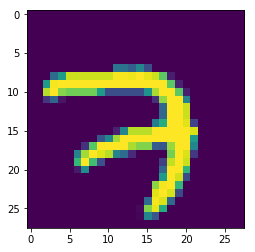

In [0]:
%matplotlib inline
from matplotlib.pyplot import imshow

#Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

print(mnist.train.images.shape)
#MNIST data input (img shape: 28x28)
image = mnist.train.images[0,:].reshape((28,28))
imshow(image)
print(mnist.train.labels[0])

In [0]:
#Training data
X_train = mnist.train.images
Y_train = mnist.train.labels

#Test data
X_test = mnist.test.images
Y_test = mnist.test.labels

#Test data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


#Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

#Network parameters
num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs]))
#bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

# model
h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) #output of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) #output of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) #model of the output layer

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p,labels=y)) #cross entropy cost with softmax

#Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y,1))

## 3 images, y_p=[[0.1,0,0,0.9],[0.9,0.1,0,0],[0,0.9,0,0.1]]
# tf.argmax(y_p,1) [3,0,1]
## 3 images, y=[[0,0,0,1],[0,1,0,0],[0,1,0,0]]
# tf.argmax(y,1) [3,1,1]
# tf.equal [True, False, True] or [1,0,1] -- 2/3

#Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#optimisation
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialization of the graph
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess: #Can also be used with sess = tf.Session(), but then needs to be closed manually
  sess.run(init)
  
  for i in range(1000):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    train_cost, train_accuracy = sess.run([cost, accuracy], feed_dict={x:batch_x, y:batch_y})
    #print('Iteration',i,'Training Cost: ',train_cost,'Training Accuracy:',train_accuracy)
    
    test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)
    test_cost, test_accuracy = sess.run([cost, accuracy], feed_dict={x:test_batch_x, y:test_batch_y})
    print('Iteration',i,'Training Cost: ',train_cost,'Training Accuracy:',train_accuracy,'Test Cost: ',test_cost,'Test Accuracy:',test_accuracy)
  
  #y_p_p = sess.run(y_p, feed_dict={x:X_train, y:Y_train})
  #print('Predicted: ',y_p_p)
  #print("Ground truth: ", Y_train)

# CNN

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
[None, 14, 14, 32]


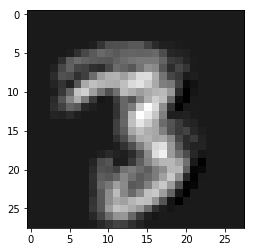

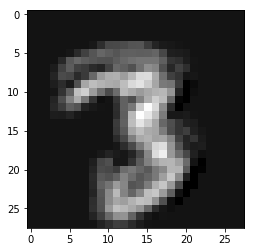

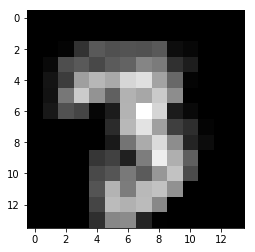

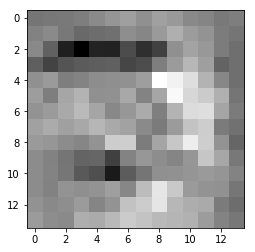

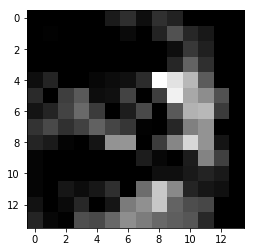

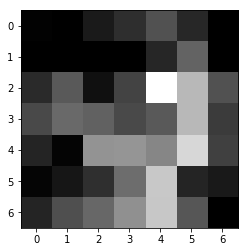

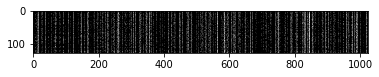

Iteration 0 Training Cost:  50304.35 Training Accuracy: 0.1015625 Test Cost:  59215.523 Test Accuracy: 0.0546875


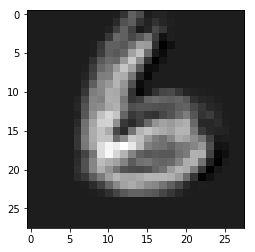

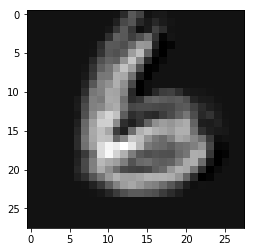

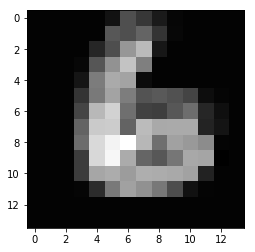

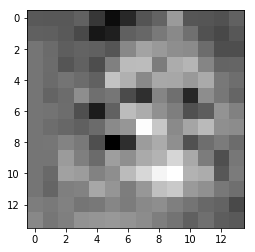

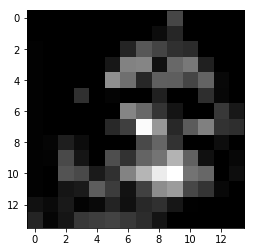

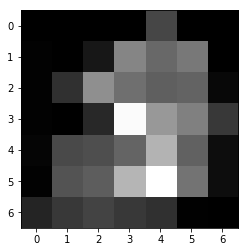

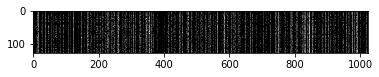

Iteration 100 Training Cost:  1817.4967 Training Accuracy: 0.8671875 Test Cost:  1933.1332 Test Accuracy: 0.8203125


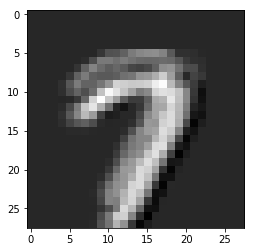

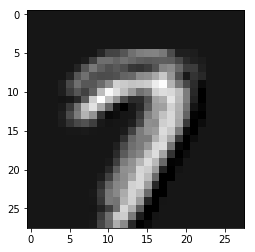

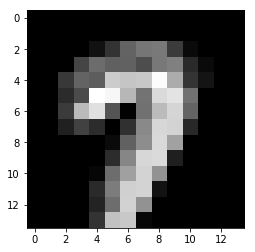

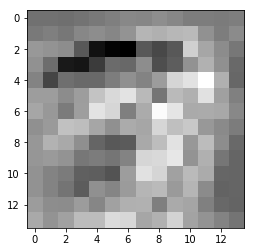

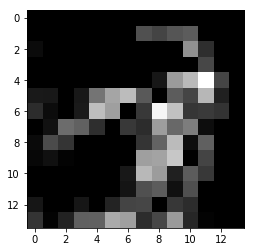

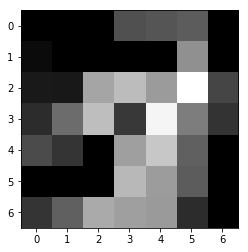

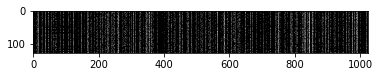

Iteration 200 Training Cost:  2050.835 Training Accuracy: 0.8984375 Test Cost:  1055.5173 Test Accuracy: 0.890625


KeyboardInterrupt: ignored

In [25]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
#dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
#keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)



def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')
  # Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1_pre_activation = conv2d(x, weights['wc1'], biases['bc1'])
    conv1_post_activation = tf.nn.relu(conv1_pre_activation)
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1_post_activation, k=2)
    
    print(conv1.get_shape().as_list()) #Just to see the shape after the first layer

    # Convolution Layer
    conv2_pre_activation = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2_post_activation = tf.nn.relu(conv2_pre_activation)
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2_post_activation, k=2)
    
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    list_of_tensors = [conv1_pre_activation,conv1_post_activation,conv1,conv2_pre_activation,conv2_post_activation,conv2,fc1]
    return out, list_of_tensors
  
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred, list_of_tensors = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess: #Can also be used with sess = tf.Session(), but then needs to be closed manually
  sess.run(init)
  
  for i in range(10000):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    train_cost, train_accuracy = sess.run([cost, accuracy], feed_dict={x:batch_x, y:batch_y})
    #print('Iteration',i,'Training Cost: ',train_cost,'Training Accuracy:',train_accuracy)
    
    test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)
    test_cost, test_accuracy = sess.run([cost, accuracy], feed_dict={x:test_batch_x, y:test_batch_y})
    if i % 100 == 0:
      val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
      imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')
      plt.show()
      imshow(val_list_of_tensors[1][0,:,:,0], cmap='gray')
      plt.show()
      imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')
      plt.show()
      imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')
      plt.show()
      imshow(val_list_of_tensors[4][0,:,:,0], cmap='gray')
      plt.show()
      imshow(val_list_of_tensors[5][0,:,:,0], cmap='gray')
      plt.show()
      imshow(val_list_of_tensors[-1], cmap='gray')
      plt.show()
      print('Iteration',i,'Training Cost: ',train_cost,'Training Accuracy:',train_accuracy,'Test Cost: ',test_cost,'Test Accuracy:',test_accuracy)
  
  
  #y_p_p = sess.run(y_p, feed_dict={x:X_train, y:Y_train})
  #print('Predicted: ',y_p_p)
  #print("Ground truth: ", Y_train)
  
  



```
# This is formatted as code
```


Before we jump into Tensorflow, we will implemented our first neural network model using Python Numpy package. NumPy is the fundamental package for scientific computing with Python, such as:

1. Linear Algebra
2. Statistics
3. Calculus

## A brief intro to Numpy operations:

1. Creating a Vector:
Here we use Numpy to create a 1-D Array which we then call a vector.





In [0]:
#Load Library
import numpy as np

#Create a vector as a Row
vector_row = np.array([1,2,3])

#Create vector as a Column
vector_column = np.array([[1],[2],[3]])

2. Creating a Matrix
We Create a 2-D Array in Numpy and call it a Matrix. It contains 2 rows and 3 columns.

In [0]:
#Load Library
import numpy as np

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6]])
print(matrix)

3. Selecting Elements


In [0]:
#Load Library
import numpy as np

#Create a vector as a Row
vector_row = np.array([ 1,2,3,4,5,6 ])

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)

#Select 3rd element of Vector
print(vector_row[2])

#Select 2nd row 2nd column
print(matrix[1,1])
#Select all elements of a vector
print(vector_row[:])
#Select everything up to and including the 3rd element
print(vector_row[:3])
#Select the everything after the 3rd element
print(vector_row[3:])
#Select the last element
print(vector_row[-1])
#Select the first 2 rows and all the columns of the matrix
print(matrix[:2,:])
#Select all rows and the 2nd column of the matrix
print(matrix[:,1:2])


4. Describing a Matrix

In [0]:
import numpy as np


#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
#View the Number of Rows and Columns
print(matrix.shape)
#View the number of elements (rows*columns)
print(matrix.size)
#View the number of Dimensions(2 in this case)
print(matrix.ndim)

5. Finding the max and min values

In [0]:
#Load Library
import numpy as np

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)
#Return the max element
print(np.max(matrix))
#Return the min element
print(np.min(matrix))
#To find the max element in each column
print(np.max(matrix,axis=0))
#To find the max element in each row
print(np.max(matrix,axis=1))

6. Reshaping Arrays


In [0]:
#Load Library
import numpy as np

#Create a Matrix
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix)
#Reshape
print(matrix.reshape(9,1))
#Here -1 says as many columns as needed and 1 row
print(matrix.reshape(1,-1))
#If we provide only 1 value Reshape would return a 1-d array of that length
print(matrix.reshape(9))
#We can also use the Flatten method to convert a matrix to 1-d array
print(matrix.flatten())

7. Calculating Dot Products

In [0]:
#Load Library
import numpy as np

#Create vector-1
vector_1 = np.array([ 1,2,3 ])
#Create vector-2
vector_2 = np.array([ 4,5,6 ])
#Calculate Dot Product
print(np.dot(vector_1,vector_2))
#Alternatively you can use @ to calculate dot products
print(vector_1 @ vector_2)

##Linear regression in Numpy:

---



Write the numpy code for the following model:

$Y=WX+B$

where $X$ is 3x10 matrix:  10 samples and 3 features

$Y$ is 4x10 matrix: 10 samples and 4 outputs

$W$ is the weights matrix with the shape 4x3: connecting 3 inputs to 4 outputs

$b$ is a vector with a size 4 ( one bias per output)


In [0]:
#Load Library
import numpy as np

# Generate a random X (we do not have a real data)
X = np.random.rand(3,10)
display(X.shape)

# Generate a random weights vector
W = np.random.rand(4,3)

# Generate a random bias 
b = np.random.rand(4,1)

# Calculate Y
Y= np.dot(W,X) + b
display(Y.shape)


## One neuron model in numpy:

A single neuron has multiple inputs and one output, in addition to the linear regression model, we need to add non linearity through an activation function:

$Y= f(WX+B)$

where $X$ is n x m matrix:  m samples and n features/inputs

$f(g)= \frac{1}{1+\exp(-g)}$  is a sigmoid acitavation function

$Y$ is nh1 x m matrix: m samples and ny outputs

$W$ is the weights matrix with the shape nh1 x n: connecting 3 inputs to 4 outputs

$b$ is a vector with a size nh1 ( one bias per output)





In [0]:
# load Library
import numpy as np 

f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)

# Generate a random X (we do not have a real data)
X = np.random.rand(3,10)


# Generate a random weights vector
W = np.random.rand(1,3)


# Generate a random bias 
b = np.random.rand()

# Calculate Y
Y= f(np.dot(W,X) + b)
display(Y)


## One hidden layer model in numpy:

The difference from the one neuron model is simple:  we need only to change the number of output "ny"

In [0]:
# load Library
import numpy as np 

#Suppose we have the following NN architecture

m = 10 # Number of samples
ni= 3 # Number of input neurons
h = 1 # Number of hidden layers
nh1 = 4 # Number of neurons in the hidden layer 1
no =1 # Number of neurons in the output layer



f = lambda x: 1.0/(1.0 + np.exp(-x)) # activation function (use sigmoid)

# Generate a random X (we do not have a real data)
X = np.random.rand(ni,m)


# Generate a random weights vector for the first hidden layer
W1 = np.random.rand(nh1,ni)


# Generate a random bias for the first hidden layer 
b1 = np.random.rand(nh1,1)

# Generate a random weights vector for the output layer
W2 = np.random.rand(no,nh1)

# Generate a random bias for the output layer 
b2 = np.random.rand(no,1)

# Calculate output of the first hidden layer
Yh1= f(np.dot(W1,X) + b1)

# Calculate output of the output layer

Y= f(np.dot(W2,Yh1) + b2)

display(Yh1.shape)
display(Y.shape)

## Gradient descent in Numpy:
Let us now start training a neural network
We start by implementing a simple gradient descent for linear regression

In [0]:
converged = False
iter = 0
m = 10 # Number of samples
ni= 1 # Number of input neurons
h = 1 # Number of hidden layers
no =1 # Number of neurons in the output layer

# Generate a random X (we do not have a real data)
X = np.random.rand(m)
display(X)

# learning rate
alpha =0.01

# early stop criteria 
ep=0.001

# maximum number of training iterations
max_iter=100

# Generate a random weights vector for the output layer
W1 = np.random.rand()

# Generate a random bias for the output layer 
b1 = np.random.rand()

# Generate a random ground truth
Y_gr = np.random.rand(m)


J = sum([(b1 + W1*X[i] - Y_gr[i])**2 for i in range(m)])

while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(b1 + W1*X[i] - Y_gr[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(b1 + W1*X[i] - Y_gr[i])*X[i] for i in range(m)])
        
        # update the theta_temp
        temp0 = W1 - alpha * grad0
        temp1 = b1 - alpha * grad1
        # update theta
        W1 = temp0
        b1 = temp1
        
        # sum squared error
        e = sum([(b1 + W1*X[i] - Y_gr[i])**2 for i in range(m)]) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

##Assignment 1
### Backpropagation in Numpy:
